## Lena teaches the FRC

In this analysis we make use of $(512\times512)$ Lena image
to show the underlying relation between the Fourier Ring Correlation
(FRC) and the Signal-to-Noise Ratio (SNR). We will also show how a
particular threshold is formulated and how diagonal splitting of an
image perturbs the corresponding FRC result.

In [1]:
import sys
import secondary_utils as su
import frc_utils as frc_util
import imageio
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

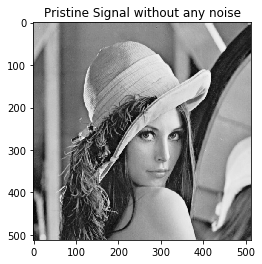

In [2]:
lena  = su.imageio_imread('./demo_images/512/lena512.jpg')
lena  = lena[:, :, 0]
lena  = lena.astype(np.float)
lena  = su.normalize_data_ab(0, 1, lena)

#average true signal in each pixel of lena 
h, w = lena.shape
plt.imshow(lena, cmap='Greys_r')
plt.title('Pristine Signal without any noise')
plt.show()

For the FRC analysis we consider two different measurements of the same signal

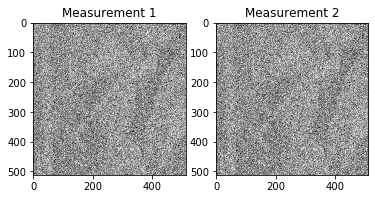

In [3]:
noisy_lena1 = su.imageio_imread('./demo_images/512/noisy_lena1.tif')
noisy_lena2 = su.imageio_imread('./demo_images/512/noisy_lena2.tif')
f, axrr = plt.subplots(1, 2)
axrr[0].imshow(noisy_lena1, cmap='Greys_r')
axrr[0].set_title('Measurement 1')
axrr[1].imshow(noisy_lena1, cmap='Greys_r')
axrr[1].set_title('Measurement 2')
plt.show()

The FRC between images $1$ and $2$ is defined as:
\begin{equation}\text{FRC}_{12}(q_{i})=\frac{\underset{q\epsilon q_{i}}{\sum}F_{1}(q)\cdot F_{2}(q)^{*}}{\sqrt{\underset{q\epsilon q_{i}}{\sum}F_{1}^{2}(q)\cdot\underset{q\epsilon q_{i}}{\sum}F_{2}^{2}(q)}}.\end{equation}

Note that $F_{1}(q)$ is the Fourier transform of image 1 and $F_{2}(q)^{*}$
is the complex conjugate of the Fourier transform of image 2. Likewise
$q\ \epsilon\ q_{i}$ is the ring at radius $i$ in the frequency
domain of any of the two images. 

ring plots is: True
performed by index method


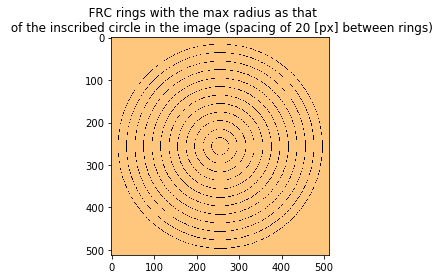

In [4]:
_ = frc_util.ring_indices(noisy_lena1, inscribed_rings=True, plot=True)

ring plots is: True
performed by index method


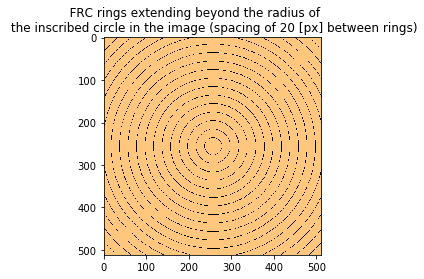

In [5]:
_ = frc_util.ring_indices(noisy_lena1, inscribed_rings=False, plot=True)

FRC from noisy measurements of Lena image is as follows: 

In [6]:
inscribed_rings=True
anaRing=True 
xf, frc, _, _ = frc_util.FRC(noisy_lena1, noisy_lena2, inscribed_rings=inscribed_rings, analytical_arc_based=anaRing)

performed by index method
performed by index method
performed by index method


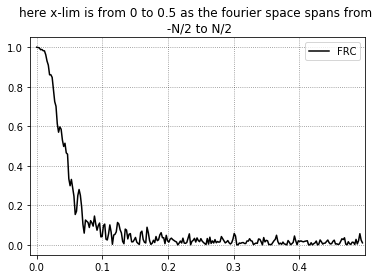

In [7]:
plt.xlim(-0.01, 0.5)
plt.plot(xf[:-1]/2, frc[:-1], label = 'FRC', color='black')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.grid(linestyle='dotted', color='black', alpha=0.5) 
plt.title('here x-lim is from 0 to 0.5 as the fourier space spans from \n -N/2 to N/2')
plt.legend()
plt.show()

The signal component in both the measurements/images is considered to be the same while they differ with each other in-term of their corresponding noise components such that:
\begin{equation}
F_{1}(q)=S(q)+N_{1}(q),\label{eq:Sig-noise-img1}
\end{equation}

\begin{equation}
F_{2}(q)=S(q)+N_{2}(q).\label{eq:Sig-noise-img2}
\end{equation}

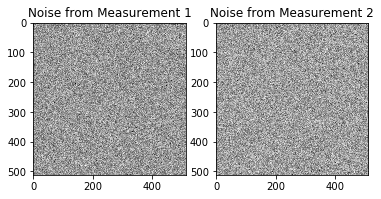

In [8]:
signal = lena
noise1 = noisy_lena1 - lena
noise2 = noisy_lena2 - lena
f, axrr = plt.subplots(1, 2)

#f.colorbar(axrr[0].imshow(noise1, cmap='Greys_r'), ax=axrr[0])
axrr[0].imshow(noise1, cmap='Greys_r')
axrr[0].set_title('Noise from Measurement 1')
axrr[1].imshow(noise2, cmap='Greys_r')
axrr[1].set_title('Noise from Measurement 2')
plt.show()

Now, if we use the SNR definition (${\text{SNR}}_{1}\equiv\bar{S^{2}}/\bar{N_{1}^{2}}$),
the formula for FRC can be written in-terms of SNR as follows:

\begin{equation}
\text{FRC}(q_{i})=\frac{\text{SNR}(q_{i})+2\frac{\sqrt{\text{SNR}(q_{i})}}{\sqrt{n(q_{i})}}+\frac{1}{\sqrt{n(q_{i})}}}{\text{SNR}(q_{i})+2\frac{\sqrt{\text{SNR}(q_{i})}}{\sqrt{n(q_{i})}}+1}.\label{eq:FRC_def_using_SNR}
\end{equation}

Rather than using the average SNR value for each image, if we use the SNR value for each pixel in the ring $q_{i}$ , we will observe that FRC plot Fourier Transforms of the measurements aligns close with the FRC definition using SNR of these measurements.

ring plots is: False
performed by index method


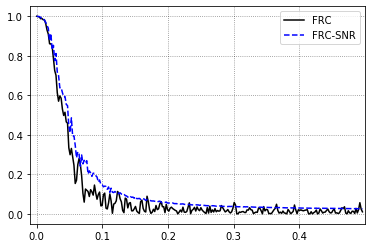

In [9]:
r_ind = frc_util.ring_indices(noisy_lena1, inscribed_rings=inscribed_rings, plot=False)
fft_lena     = fft.fftshift(fft.fft2(lena))
fft_n1       = fft.fftshift(fft.fft2(noise1))
frc4rmSNR    = frc_util.frc_4rm_snr(r_ind, fft_lena, fft_n1)

plt.xlim(-0.01, 0.5)                                 
plt.plot(xf[:-1]/2, frc[:-1], label = 'FRC', color='black')
plt.plot(xf[:-1]/2, frc4rmSNR[:-1], '--', label = 'FRC-SNR', color='blue')                                
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.grid(linestyle='dotted', color='black', alpha=0.5) 
plt.legend()
plt.show()

Generally, we may have $\textit{a-prior}$ knowledge that on average each
pixel in our image exhibits $1/2-\text{bit}$ of information. This
knowledge in-turn implies that the SNR for this particular measurement
is $0.4142$ since

$(1/2-\text{bit}=\log_{2}(1.4142)=\log_{2}(1+0.4142)=\log_{2}(1+\text{SNR})).$

Now, we can define $1/2-\text{}$ bit FRC thresholds making use of
the aforementioned analysis as:

\begin{equation}
\text{T}_{1/2-\text{bit}}=\frac{0.4142+\frac{2.2872}{\sqrt{n(q_{i})}}}{1.4142+\frac{1.2872}{\sqrt{n(q_{i})}}}.\label{eq:half-bit-threshold}
\end{equation}

In [10]:
_, _, x_T, T = frc_util.FRC(noisy_lena1, noisy_lena1, thresholding='half-bit', info_split=False)

performed by index method
performed by index method
performed by index method


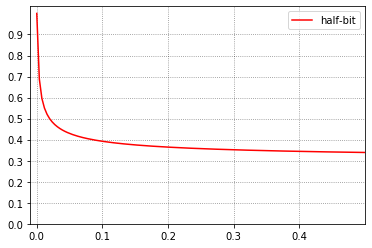

In [11]:
plt.xlim(-0.01, 0.5)
plt.plot(x_T[:-1], T[:-1], label = 'half-bit', color='red')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))

plt.grid(linestyle='dotted', color='black', alpha=0.5) 
plt.legend()
plt.show()


In [12]:
len(T)

256

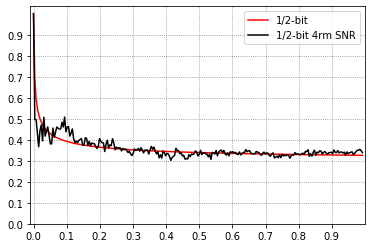

In [13]:
real_frc4rmSNR    = frc_util.frc_4rm_snr(r_ind, lena, noise1)

plt.xlim(-0.01, 1)
plt.plot(x_T[:-1], T[:-1], label = '1/2-bit', color='red')
plt.plot(x_T[:-1], real_frc4rmSNR[:-1], label = '1/2-bit 4rm SNR', color='black')
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.grid(linestyle='dotted', color='black', alpha=0.5) 
plt.legend()
plt.show()


In our implementation, we split image intead of using two adjacent images.
In particular, we make use of diagonal splitting 
such that each measurement ($I$) is diagonally split into it four corresponding measurements
($\mathscr{I}_{1},\mathscr{I}_{2},\mathscr{I}_{3},\mathscr{I}_{4}$).
Each of these four splitted images differ in their respective noise
levels ($\mathscr{N}_{1},\mathscr{N}_{2},\mathscr{N}_{3},\mathscr{N}_{4}$)
while exhibiting same signal $s$.

In [14]:
nl1, nl2, nl3, nl4   = frc_util.diagonal_split(noisy_lena1)
lena1, lena2, lena3, lena4 = frc_util.diagonal_split(lena)

/home/beams0/PKC/Implementations/chip_resolution/siFRC/frc_utils.py:65: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  s_a1 = x[ind]
/home/beams0/PKC/Implementations/chip_resolution/siFRC/frc_utils.py:70: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  s_a2 = x[ind]
/home/beams0/PKC/Implementations/chip_resolution/siFRC/frc_utils.py:75: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)

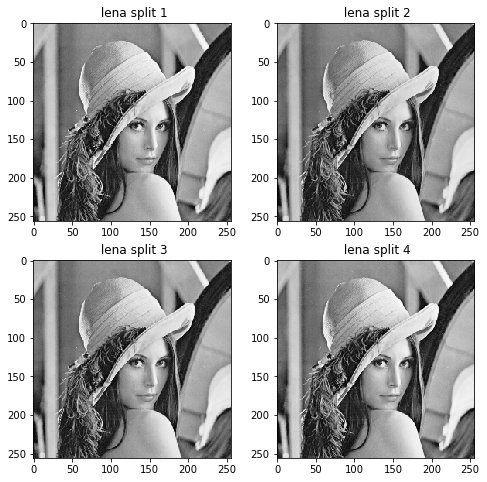

In [15]:
f, axrr = plt.subplots(2, 2, figsize=[8,8])

#f.colorbar(axrr[0].imshow(noise1, cmap='Greys_r'), ax=axrr[0])
axrr[0, 0].imshow(lena1, cmap='Greys_r')
axrr[0, 0].set_title(' lena split 1')
axrr[0, 1].imshow(lena2, cmap='Greys_r')
axrr[0, 1].set_title(' lena split 2')
axrr[1, 0].imshow(lena3, cmap='Greys_r')
axrr[1, 0].set_title(' lena split 3')
axrr[1, 1].imshow(lena4, cmap='Greys_r')
axrr[1, 1].set_title(' lena split 4')

plt.show()

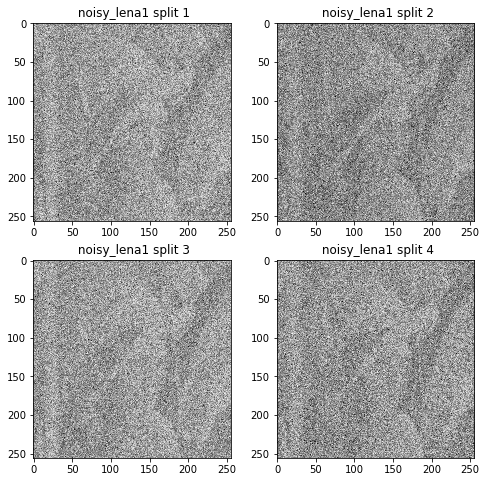

In [16]:
f, axrr = plt.subplots(2, 2, figsize=[8,8])

#f.colorbar(axrr[0].imshow(noise1, cmap='Greys_r'), ax=axrr[0])
axrr[0, 0].imshow(nl1, cmap='Greys_r')
axrr[0, 0].set_title(' noisy_lena1 split 1')
axrr[0, 1].imshow(nl2, cmap='Greys_r')
axrr[0, 1].set_title(' noisy_lena1 split 2')
axrr[1, 0].imshow(nl3, cmap='Greys_r')
axrr[1, 0].set_title(' noisy_lena1 split 3')
axrr[1, 1].imshow(nl4, cmap='Greys_r')
axrr[1, 1].set_title(' noisy_lena1 split 4')

plt.show()

#### Cross-checking if the threshold is to be adjusted as we perform
#### the diagonal splitting of the single image. This is determined
#### with the help of SNR value of each pixels in the FRC ring

ring plots is: False
performed by index method


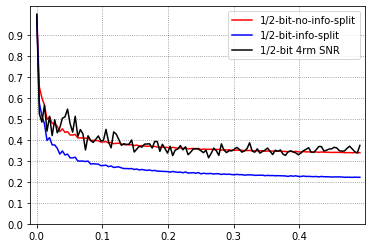

In [18]:
r_ind = frc_util.ring_indices(nl1, inscribed_rings=inscribed_rings, plot=False)

real_frc4rmSNR    = frc_util.frc_4rm_snr(r_ind, lena1, nl1-lena1)

N_ind = len(r_ind)  
n = np.zeros(N_ind) 
for i in range(N_ind):
  n[i] = len(r_ind[i][0])
inv_sqrt_n = np.divide(np.ones(np.shape(n)),np.sqrt(n)) # 1/sqrt(n)

x_T = np.arange(N_ind)/(np.shape(nl1)[0]/2)
T = (0.4142+2.287*inv_sqrt_n)/ (1.4142+1.287*inv_sqrt_n)
T2 = (0.2071+1.9102*inv_sqrt_n)/(1.2071+0.9102*inv_sqrt_n)
T3 = (0.4142*0.25+1.6436*inv_sqrt_n)/ (1.1036+0.6436*inv_sqrt_n)

plt.xlim(-0.01, 0.5)
plt.plot(x_T[:-1]/2, T[:-1], label = '1/2-bit-no-info-split', color='red')
plt.plot(x_T[:-1]/2, T2[:-1], label = '1/2-bit-info-split', color='blue')
plt.plot(x_T[:-1]/2, real_frc4rmSNR[:-1], label = '1/2-bit 4rm SNR', color='black')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.grid(linestyle='dotted', color='black', alpha=0.5) 
plt.legend()
plt.show()

### The above plot shows that half-bit info is not split as we perform diagonal splitting.
Here information stored in each pixel is not splitted rather the whole image is splitted. So the bit of information stored in each pixel does not need to be scaled down while calculating (half-bit) threshold. Rather we will multiply final resolution by sqrt(2) to account for diagonal splitting of the whole image..

In [19]:
xc, corr1, xt, thres = frc_util.FRC(nl1, nl2, thresholding='half-bit', inscribed_rings=inscribed_rings, analytical_arc_based=anaRing)
xc, corr2, _ , _    = frc_util.FRC(nl3, nl4, thresholding='half-bit', inscribed_rings=inscribed_rings, analytical_arc_based=anaRing)
xc, corr3, _ , _    = frc_util.FRC(nl1, nl4, thresholding='half-bit', inscribed_rings=inscribed_rings, analytical_arc_based=anaRing)
xc, corr4, _ , _    = frc_util.FRC(nl3, nl2, thresholding='half-bit', inscribed_rings=inscribed_rings, analytical_arc_based=anaRing)
xc, corr5, _ , _    = frc_util.FRC(nl1, nl3, thresholding='half-bit', inscribed_rings=inscribed_rings, analytical_arc_based=anaRing)
xc, corr6, _ , _    = frc_util.FRC(nl2, nl4, thresholding='half-bit', inscribed_rings=inscribed_rings, analytical_arc_based=anaRing)

splitted_frc = (corr1+corr2)/2
splitted_frc_b = (corr1+corr2+corr3+corr4)/4
splitted_frc_c = (corr1+corr2+corr3+corr4+corr5+corr6)/6

performed by index method
performed by index method
performed by index method
performed by index method
performed by index method
performed by index method
performed by index method
performed by index method
performed by index method
performed by index method
performed by index method
performed by index method
performed by index method
performed by index method
performed by index method
performed by index method
performed by index method
performed by index method


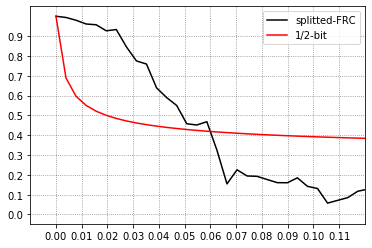

In [20]:
plt.xlim(-0.01, 0.12)
plt.plot(xc[:-1]/2, splitted_frc[:-1], label = 'splitted-FRC', color='black')
plt.plot(xt[:-1]/2, thres[:-1], label = '1/2-bit', color='red')
plt.xticks(np.arange(0, 0.12, step=0.01))
plt.yticks(np.arange(0, 1, step=0.1))
plt.grid(linestyle='dotted', color='black', alpha=0.5) 
plt.legend()
plt.show()

In [21]:
1/0.062

16.129032258064516

performed by index method
performed by index method
performed by index method


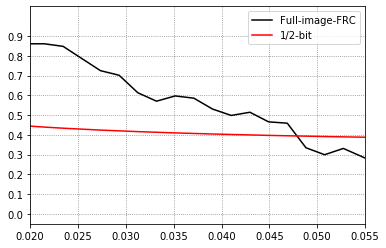

In [22]:
xf, wholefrc, xt, thres = frc_util.FRC(noisy_lena1, noisy_lena2, inscribed_rings=inscribed_rings, analytical_arc_based=anaRing)

plt.xlim(0.02, 0.05)
plt.plot(xf[:-1]/2, wholefrc[:-1], label = 'Full-image-FRC', color='black')
plt.plot(xt[:-1]/2, thres[:-1], label = '1/2-bit', color='red')
plt.xticks(np.arange(0.02, 0.06, step=0.005))
plt.yticks(np.arange(0, 1, step=0.1))
plt.grid(linestyle='dotted', color='black', alpha=0.5) 
plt.legend()
plt.show()

# FRC value from the two non-splitted images

In [23]:
1/0.0475

21.05263157894737

# FRC from non-splitted images ~ FRC from splitted image x sqrt(2)

In [24]:
16.1*np.sqrt(2)

22.768838354206835

# FRC of splitted image based on average value from 4 pairs

In [25]:
xc, corr1, xt, thres_val = frc_util.FRC(nl1, nl2, inscribed_rings=inscribed_rings, analytical_arc_based=anaRing)
_, corr2, _, _           = frc_util.FRC(nl3, nl4, inscribed_rings=inscribed_rings, analytical_arc_based=anaRing)
_, corr3, _, _           = frc_util.FRC(nl1, nl3, inscribed_rings=inscribed_rings, analytical_arc_based=anaRing)

corr_avg                 = (corr1+corr2)/2.0


performed by index method
performed by index method
performed by index method
performed by index method
performed by index method
performed by index method
performed by index method
performed by index method
performed by index method


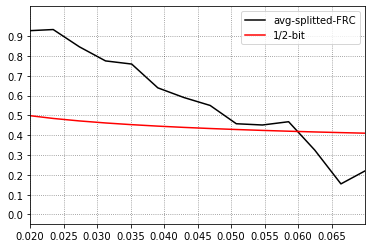

In [26]:
plt.xlim(0.02, 0.07)
plt.plot(xc[:-1]/2, corr_avg[:-1], label = 'avg-splitted-FRC', color='black')
plt.plot(xt[:-1]/2, thres_val[:-1], label = '1/2-bit', color='red')
plt.xticks(np.arange(0.02, 0.07, step=0.005))
plt.yticks(np.arange(0, 1, step=0.1))
plt.grid(linestyle='dotted', color='black', alpha=0.5) 
plt.legend()
plt.show()

In [27]:
np.sqrt(2)/0.059

23.969721396154156